## Introduction
The Indian Premier League (IPL),is a professional Twenty20 cricket league in India contested during April and May of every year by teams representing Indian cities. The league was founded by the Board of Control for Cricket in India (BCCI) in 2007. The IPL is the most-attended cricket league in the world and ranks sixth among all sports league.



## Objective

- Aim is to provide some interesting insights by analyzing the IPL data.
- To find the team that won the most number of matches in a season.
- To find the team that lost the most number of matches in a season.
- Does winning toss increases the chances of victory.
- To find the player with the most player of the match awards.
- To find the city that hosted the maximum number of IPL matches.
- To find the most winning team for each season.
- To find the on-field umpire with the maximum number of IPL matches.
- To find the biggest victories in IPL while defending a total and while chasing a total.

## Variables Description

**The dataset has 18 columns. Let’s get acquainted with the columns.**
- id: The IPL match id.
- season: The IPL season
- city: The city where the IPL match was held.
- date: The date on which the match was held.
- team1: One of the teams of the IPL match
- team2: The other team of the IPL match
- toss_winner: The team that won the toss
- toss_decision: The decision taken by the team that won the toss to ‘bat’ or ‘field’
- result: The result(‘normal’, ‘tie’, ‘no result’) of the match.
- dl_applied: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.
- winner: The winner of the match.
- win_by_runs: Provides the runs by which the team batting first won
- win_by_runs: Provides the number of wickets by which the team batting second won.
- player_of_match: The outstanding player of the match.
- venue: The venue where the match was hosted.
- umpire1: One of the two on-field umpires who officiate the match.
- umpire2: One of the two on-field umpires who officiate the match.
- umpire3: The off-field umpire who officiates the match

In [1]:
## Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## function to add data to plot
def annot_plot(ax,w,h):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

### MATCHES DATASET

matches dataset contains data of all IPL matches from 2008 season till 2017 season.

In [3]:
match=pd.read_csv('matches.csv')
match.sample(8)

id  season       city        date                        team1  \
744  11340    2019  Bengaluru    30/04/19  Royal Challengers Bangalore   
633    634    2016      Delhi  2016-05-25          Sunrisers Hyderabad   
367    368    2012    Kolkata  2012-05-14        Kolkata Knight Riders   
735  11331    2019     Jaipur    22/04/19             Rajasthan Royals   
282    283    2011  Bangalore  2011-05-08         Kochi Tuskers Kerala   
6        7    2017     Mumbai  2017-04-09        Kolkata Knight Riders   
369    370    2012     Mumbai  2012-05-16        Kolkata Knight Riders   
499    500    2014  Hyderabad  2014-05-18          Sunrisers Hyderabad   

                           team2            toss_winner toss_decision  \
744             Rajasthan Royals       Rajasthan Royals         field   
633        Kolkata Knight Riders  Kolkata Knight Riders         field   
367          Chennai Super Kings    Chennai Super Kings         field   
735               Delhi Capitals         Delhi Capitals         field   
282  Royal Challengers Bangalore   Kochi Tuskers Kerala           bat   
6                 Mumbai Indians         Mumbai Indians         field   
369               Mumbai Indians         Mumbai Indians         field   
499        Kolkata Knight Riders    Sunrisers Hyderabad           bat   

        result  dl_applied                       winner  win_by_runs  \
744  no result           0                          NaN            0   
633     normal           0          Sunrisers Hyderabad           22   
367     normal           0          Chennai Super Kings            0   
735     normal           0               Delhi Capitals            0   
282     normal           0  Royal Challengers Bangalore            0   
6       normal           0               Mumbai Indians            0   
369     normal           0        Kolkata Knight Riders           32   
499     normal           0        Kolkata Knight Riders            0   

     win_by_wickets player_of_match  \
744               0             NaN   
633               0    MC Henriques   
367               5      MEK Hussey   
735               6         RR Pant   
282               9        CH Gayle   
6                 4          N Rana   
369               0       SP Narine   
499               7        UT Yadav   

                                         venue      umpire1        umpire2  \
744                     M. Chinnaswamy Stadium  Nigel Llong   Ulhas Gandhe   
633                           Feroz Shah Kotla    M Erasmus  C Shamshuddin   
367                               Eden Gardens    JD Cloete     SJA Taufel   
735                     Sawai Mansingh Stadium       S Ravi  Nanda Kishore   
282                      M Chinnaswamy Stadium    Aleem Dar      SS Hazare   
6                             Wankhede Stadium  Nitin Menon      CK Nandan   
369                           Wankhede Stadium        S Das    BR Doctrove   
499  Rajiv Gandhi International Stadium, Uppal     NJ Llong      CK Nandan   

            umpire3  
744  Anil Chaudhary  
633             NaN  
367             NaN  
735  Yeshwant Barde  
282             NaN  
6               NaN  
369             NaN  
499             NaN

In [4]:
#1 Checking the dimension of the match dataframe
match.shape

(756, 18)

In [5]:
#2 Checking the data structure and also if there is missing value in any row in the data frame
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [6]:
#missing data
total = match.isnull().sum().sort_values(ascending=False)
percent = (match.isnull().sum()/match.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
umpire3            637  0.842593
city                 7  0.009259
player_of_match      4  0.005291
winner               4  0.005291
umpire1              2  0.002646
umpire2              2  0.002646
toss_winner          0  0.000000
season               0  0.000000
date                 0  0.000000
team1                0  0.000000
team2                0  0.000000
result               0  0.000000
toss_decision        0  0.000000
dl_applied           0  0.000000
win_by_runs          0  0.000000
win_by_wickets       0  0.000000
venue                0  0.000000
id                   0  0.000000

#### Let's analyse this to understand how to handle the missing data.

We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is just a variable (umpire3) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which actually related to the survival of passengers (maybe that's the reason why data is missing?).

In what concerns the remaining cases, we can see that (a) 'city' variable just have seven cases of missing data. Since it is just seven observation, we'll delete these observations and keep the variable. (b) 'player of match' variable just have four cases of missing data. Since it is just four observation, we'll delete these observations and keep the variable. (c) 'winner' variable just have four cases of missing data. Since it is just four observation, we'll delete these observations and keep the variable. (d) 'umpire1' variable just have two cases of missing data. Since it is just two observation, we'll delete these observations and keep the variable. (3) 'umpire2' variable just have two cases of missing data. Since it is just two observation, we'll delete these observations and keep the variable.


*Regarding the remaining variables, we can see there were no missing cases.*



**The first thing to do before dropping values is to drop specific rows with no values or fill in the missing value with the mean**

In [7]:
#droping the column from our dataset because it's not useful for analysis
match.drop(['umpire1','umpire2','umpire3'],axis=1,inplace=True)

The variable (city, player of match, winner) cannot be filled with the mean value because it is not a numeric data, it doesn't have a mean, just letters.

In [8]:
#dropping the rows in embarked that are missing and rechecking the data info
match.dropna(inplace=True);
match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 0 to 755
Data columns (total 15 columns):
id                 745 non-null int64
season             745 non-null int64
city               745 non-null object
date               745 non-null object
team1              745 non-null object
team2              745 non-null object
toss_winner        745 non-null object
toss_decision      745 non-null object
result             745 non-null object
dl_applied         745 non-null int64
winner             745 non-null object
win_by_runs        745 non-null int64
win_by_wickets     745 non-null int64
player_of_match    745 non-null object
venue              745 non-null object
dtypes: int64(5), object(10)
memory usage: 93.1+ KB


### Now we have data ready for our analysis
**We have a complete dataset with no missing value**

## Number of matches played & Seasons we have got in the dataset

In [51]:
#Desrciptive statistics
print("Number of matches played : ", match.shape[0])
print("Number of seasons : ", (match.season.unique()))
print("Length of seasons : ",len(match['season'].unique()))

Number of matches played :  745
Number of seasons :  [2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]
Length of seasons :  12


## Number of Matches played in each IPL season

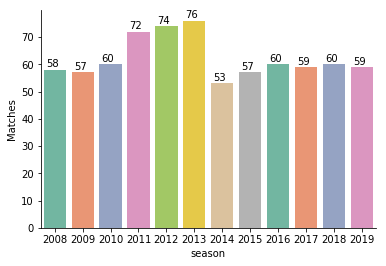

In [9]:
ax=sb.countplot('season',data=match,palette="Set2")
plt.ylabel('Matches')
annot_plot(ax,0.08,1)

**In 2013, we have the most number of matches**

## Matches Won By the Teams

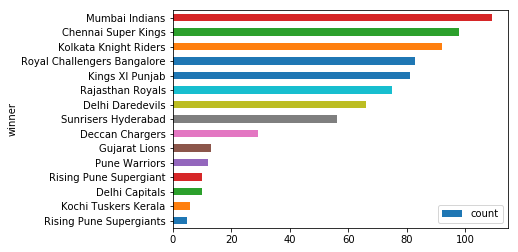

In [30]:
match.groupby('winner')['winner'].agg(['count']).sort_values('count').reset_index().plot(x='winner',y='count',kind='barh');

**Mumbai Indians won maximum number of matches followed by Chennai Super Kings.**

**Mumbai Indians are the winners in most of the matches**

## PLAYER OF THE MATCH

In [48]:
tops=match.player_of_match.value_counts()[:15]
tops

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
AM Rahane         12
MEK Hussey        12
V Sehwag          11
A Mishra          11
AD Russell        11
Name: player_of_match, dtype: int64

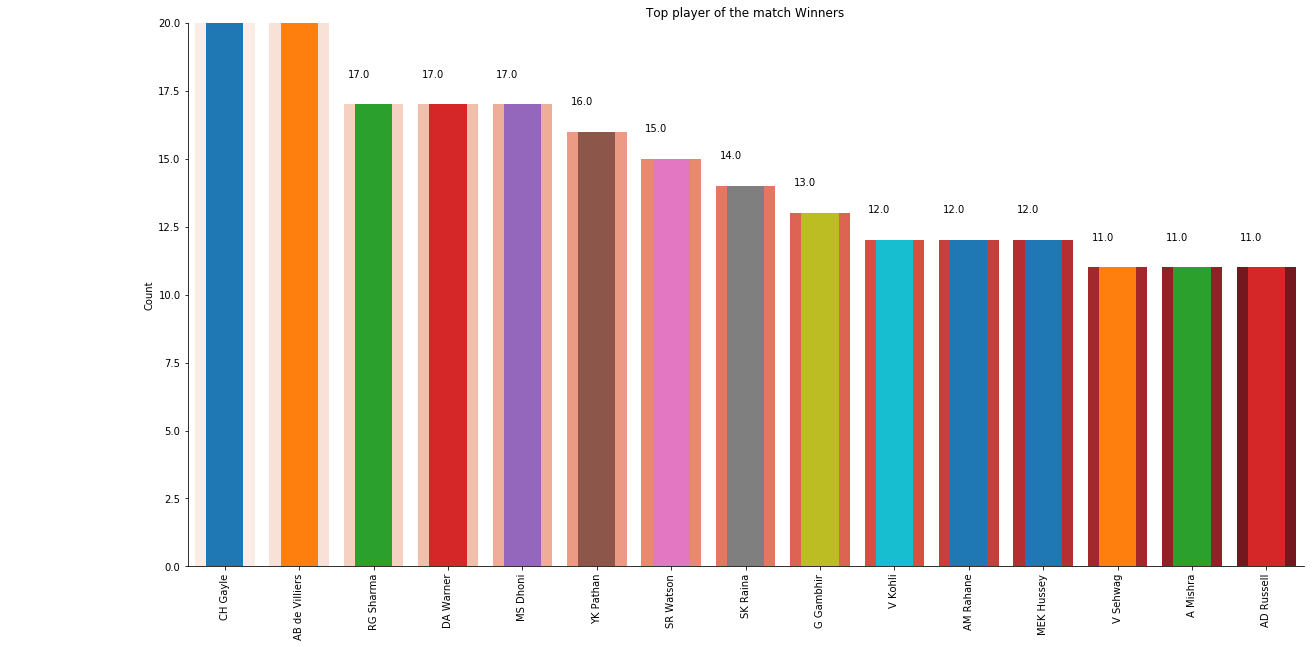

In [47]:
top_players = match.player_of_match.value_counts()[:15]
plt.figure(figsize=(20,10))
ax=sb.barplot(x = top_players.index, y = top_players, orient='v', palette="Reds")
ax.set_ylim([0,20])
annot_plot(ax,0.05,1)
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
plt.show();

### Observations:
**Cris Gayle is the player who won the most player of the match awards and hence is the most valuable player.**

**CH Gayle is the most Successful player in all match winners**

# Number of matches played in different cities

In [19]:
match.city=match.venue.astype('category')

In [20]:
#Checking number of matches played in a city in the match dataset
pd.DataFrame(match.city.value_counts())

city
Eden Gardens                                          77
Wankhede Stadium                                      73
M Chinnaswamy Stadium                                 71
Feroz Shah Kotla                                      66
Rajiv Gandhi International Stadium, Uppal             56
MA Chidambaram Stadium, Chepauk                       49
Sawai Mansingh Stadium                                47
Punjab Cricket Association Stadium, Mohali            35
Maharashtra Cricket Association Stadium               21
Subrata Roy Sahara Stadium                            17
Dr DY Patil Sports Academy                            17
Kingsmead                                             15
Punjab Cricket Association IS Bindra Stadium, M...    14
Sardar Patel Stadium, Motera                          12
SuperSport Park                                       12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...    11
Brabourne Stadium                                     11
Saurashtra Cricket Association Stadium                10
Holkar Cricket Stadium                                 9
Himachal Pradesh Cricket Association Stadium           9
New Wanderers Stadium                                  8
M. A. Chidambaram Stadium                              8
Rajiv Gandhi Intl. Cricket Stadium                     8
Feroz Shah Kotla Ground                                7
Newlands                                               7
Barabati Stadium                                       7
Sheikh Zayed Stadium                                   7
JSCA International Stadium Complex                     7
IS Bindra Stadium                                      7
St George's Park                                       7
Sharjah Cricket Stadium                                6
Shaheed Veer Narayan Singh International Stadium       6
M. Chinnaswamy Stadium                                 6
Nehru Stadium                                          5
Green Park                                             4
Vidarbha Cricket Association Stadium, Jamtha           3
De Beers Diamond Oval                                  3
Buffalo Park                                           3
OUTsurance Oval                                        2
ACA-VDCA Stadium                                       2

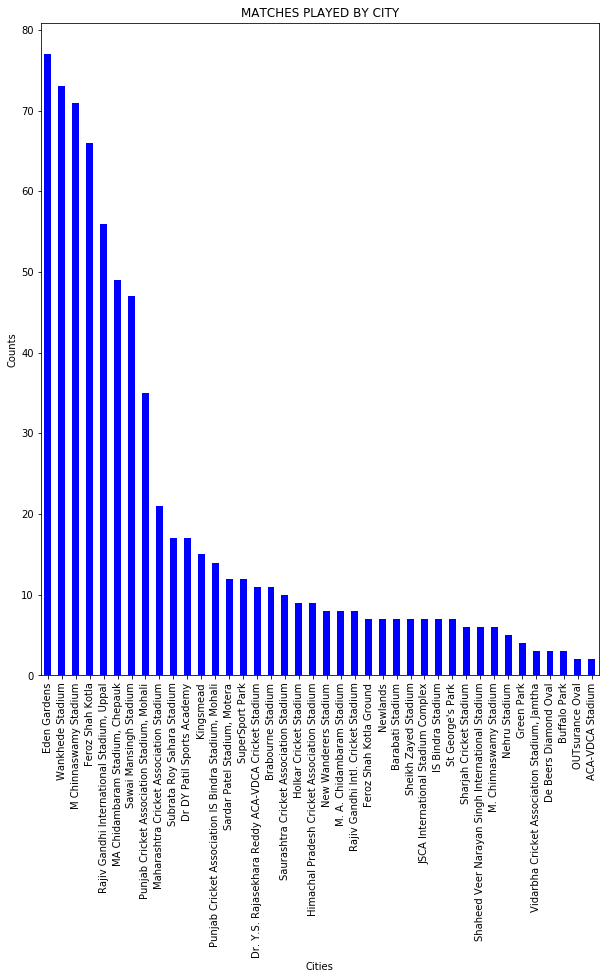

In [22]:
#Checking counts in our dataset with bar chart
plt.figure(figsize=(22,12))
plt.subplot(1,2,1);
match.city.value_counts().plot(kind='bar',title='MATCHES PLAYED BY CITY',color=['blue']);
plt.xlabel('Cities')
plt.ylabel('Counts');

# Number of matches played in different stadiums

In [10]:
match.venue=match.venue.astype('category')

In [11]:
#Checking number of matches played in a venue in the match dataset
pd.DataFrame(match.venue.value_counts())

venue
Eden Gardens                                           77
Wankhede Stadium                                       73
M Chinnaswamy Stadium                                  71
Feroz Shah Kotla                                       66
Rajiv Gandhi International Stadium, Uppal              56
MA Chidambaram Stadium, Chepauk                        49
Sawai Mansingh Stadium                                 47
Punjab Cricket Association Stadium, Mohali             35
Maharashtra Cricket Association Stadium                21
Subrata Roy Sahara Stadium                             17
Dr DY Patil Sports Academy                             17
Kingsmead                                              15
Punjab Cricket Association IS Bindra Stadium, M...     14
Sardar Patel Stadium, Motera                           12
SuperSport Park                                        12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...     11
Brabourne Stadium                                      11
Saurashtra Cricket Association Stadium                 10
Holkar Cricket Stadium                                  9
Himachal Pradesh Cricket Association Stadium            9
New Wanderers Stadium                                   8
M. A. Chidambaram Stadium                               8
Rajiv Gandhi Intl. Cricket Stadium                      8
Feroz Shah Kotla Ground                                 7
Newlands                                                7
Barabati Stadium                                        7
Sheikh Zayed Stadium                                    7
JSCA International Stadium Complex                      7
IS Bindra Stadium                                       7
St George's Park                                        7
Sharjah Cricket Stadium                                 6
Shaheed Veer Narayan Singh International Stadium        6
M. Chinnaswamy Stadium                                  6
Nehru Stadium                                           5
Green Park                                              4
Vidarbha Cricket Association Stadium, Jamtha            3
De Beers Diamond Oval                                   3
Buffalo Park                                            3
OUTsurance Oval                                         2
ACA-VDCA Stadium                                        2

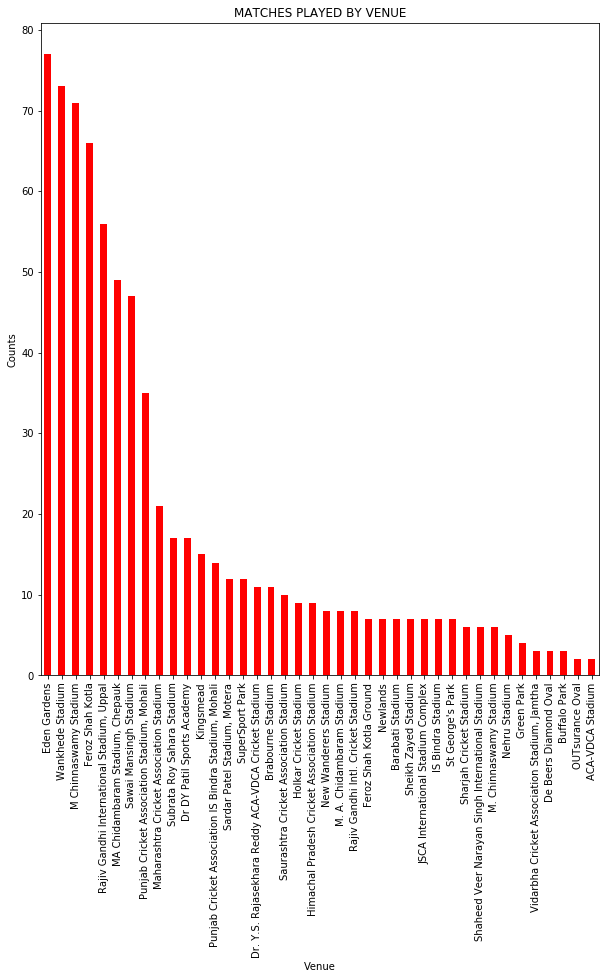

In [14]:
#Checking counts in our dataset with bar chart
plt.figure(figsize=(22,12))
plt.subplot(1,2,1);
match.venue.value_counts().plot(kind='bar',title='MATCHES PLAYED BY VENUE',color=['red']);
plt.xlabel('Venue')
plt.ylabel('Counts');

### Observations:
- Eden Gardens has hosted the maximum number of IPL matches followed by Wankhede Stadium and M Chinnaswamy Stadium.
- Till 2019, IPL matches were hosted by 40 venues.

## Who won the most matches

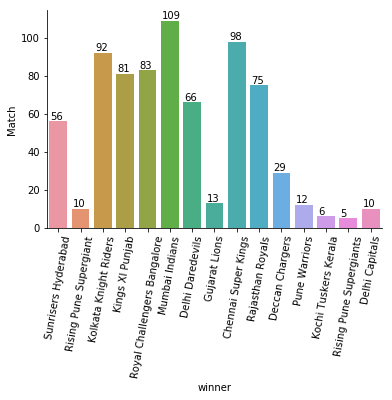

In [20]:
ax=sb.countplot(x='winner',data=match)
plt.ylabel('Match')
plt.xticks(rotation=80)
annot_plot(ax,0.05,1)

In [22]:
#Checking number of winner in the matches dataset
pd.DataFrame(match.winner.value_counts())

winner
Mumbai Indians                  109
Chennai Super Kings              98
Kolkata Knight Riders            92
Royal Challengers Bangalore      83
Kings XI Punjab                  81
Rajasthan Royals                 75
Delhi Daredevils                 66
Sunrisers Hyderabad              56
Deccan Chargers                  29
Gujarat Lions                    13
Pune Warriors                    12
Rising Pune Supergiant           10
Delhi Capitals                   10
Kochi Tuskers Kerala              6
Rising Pune Supergiants           5

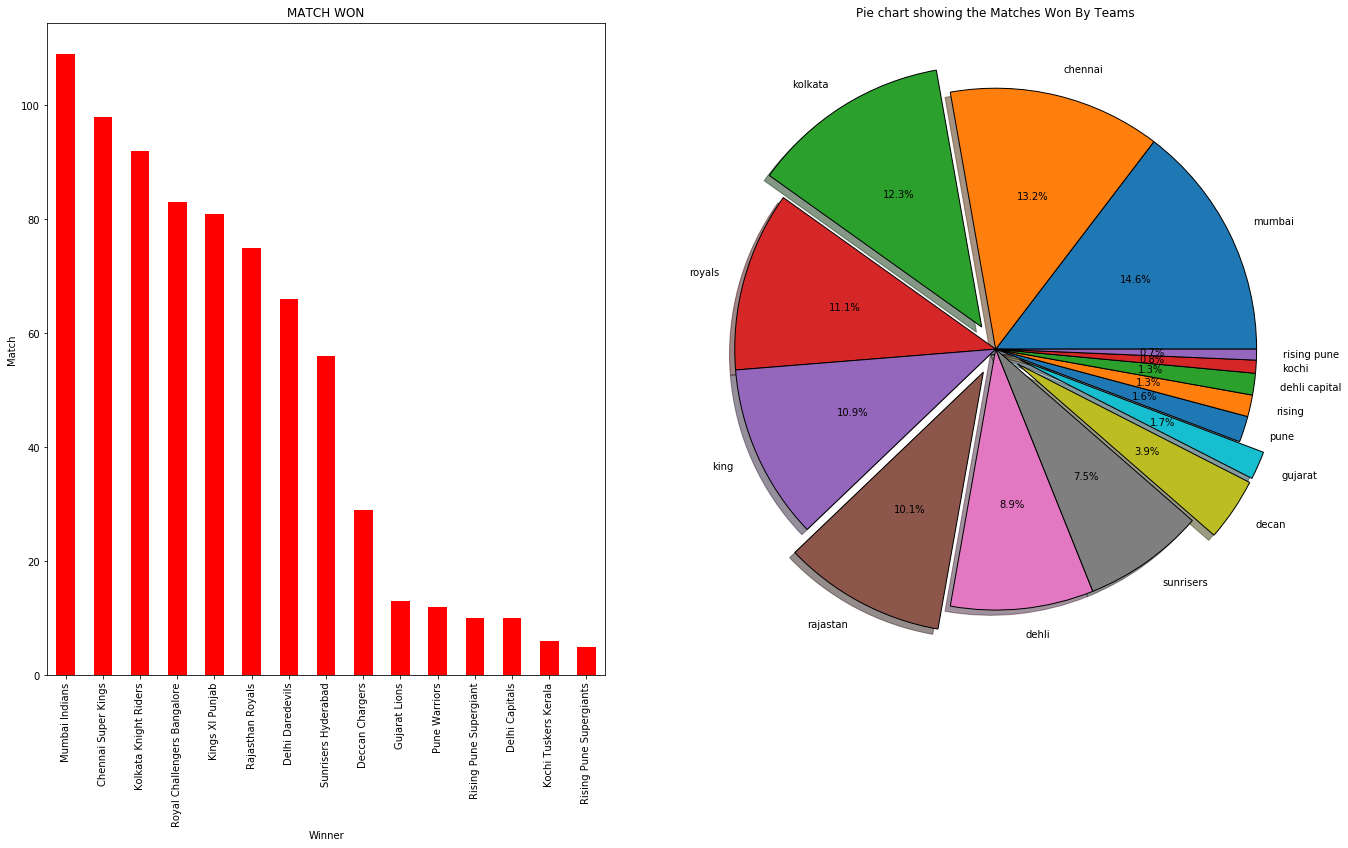

In [23]:
#Checking counts in our dataset with bar chart
plt.figure(figsize=(22,12))
plt.subplot(1,2,1);
match.winner.value_counts().plot(kind='bar',title='MATCH WON',color=['red']);
plt.xlabel('Winner')
plt.ylabel('Match');


plt.subplot(1,2,2);
win_values=[109,98,92,83,81,75,66,56,29,13,12,10,10,6,5]
win_labels=["mumbai","chennai","kolkata","royals","king","rajastan","dehli","sunrisers","decan","gujarat","pune","rising","dehli capital","kochi","rising pune"]
plt.axis("equal")
plt.title("Pie chart showing the Matches Won By Teams")
plt.pie(win_values,labels=win_labels,radius=1.0,autopct='%0.1f%%',shadow=True,explode=[0,0,0.1,0,0,0.1,0,0,0.1,0.1,0,0,0,0,0],wedgeprops={'edgecolor':'black'});


### Observations:
**Mumbai Indians is the most successful team(as they have won the maximum number of IPL matches -109) followed by Chennai Super Kings and Kolkata Knight Riders.**



## (1)WIN PERCENTAGE

In [32]:
match['win_by']=np.where(match['win_by_runs']>0,'Bat first','Bowl first')

In [33]:
mat=match.win_by.value_counts()
mat

Bowl first    419
Bat first     337
Name: win_by, dtype: int64

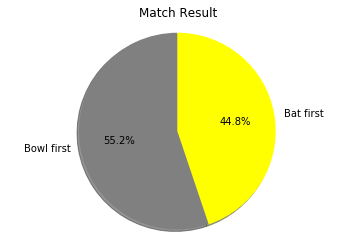

In [29]:
labels=np.array(mat.index)
sizes = mat.values
colors = ['grey', 'yellow']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Match Result')
plt.axis('equal')
plt.show()


### win percentage by season

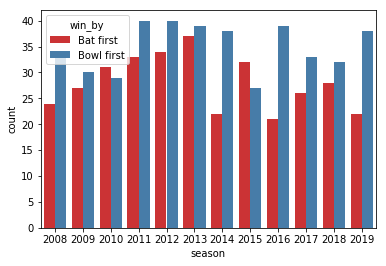

In [37]:
sb.countplot('season',hue='win_by',data=match,palette="Set1");

In [39]:
#grouping two categorical variables together(season vs win by)
byd=match.groupby("season").win_by.value_counts()
byd

season  win_by    
2008    Bowl first    34
        Bat first     24
2009    Bowl first    30
        Bat first     27
2010    Bat first     31
        Bowl first    29
2011    Bowl first    40
        Bat first     33
2012    Bowl first    40
        Bat first     34
2013    Bowl first    39
        Bat first     37
2014    Bowl first    38
        Bat first     22
2015    Bat first     32
        Bowl first    27
2016    Bowl first    39
        Bat first     21
2017    Bowl first    33
        Bat first     26
2018    Bowl first    32
        Bat first     28
2019    Bowl first    38
        Bat first     22
Name: win_by, dtype: int64

In [40]:
#plotting clustered bar chart of win by vs season
byd=byd.reset_index(name='count')
byd.pivot(index='season',columns='win_by',values='count')

win_by  Bat first  Bowl first
season                       
2008           24          34
2009           27          30
2010           31          29
2011           33          40
2012           34          40
2013           37          39
2014           22          38
2015           32          27
2016           21          39
2017           26          33
2018           28          32
2019           22          38

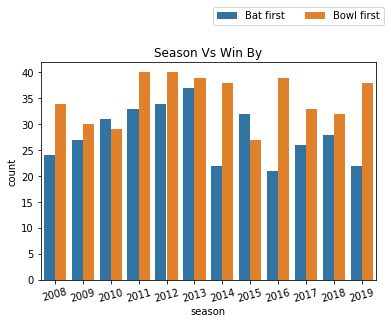

In [41]:
sb.countplot(data=match,x='season',hue='win_by')
plt.xticks(rotation=15)
plt.legend(loc="lower left", bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.title('Season Vs Win By');

## (2)TOSS DECISION

In [42]:
toss=match.toss_decision.value_counts()
toss

field    463
bat      293
Name: toss_decision, dtype: int64

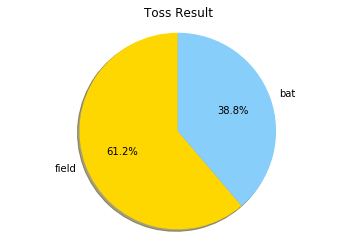

In [43]:
labels=np.array(toss.index)
sizes = toss.values
colors = ['gold', 'lightskyblue']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss Result')
plt.axis('equal')
plt.show()

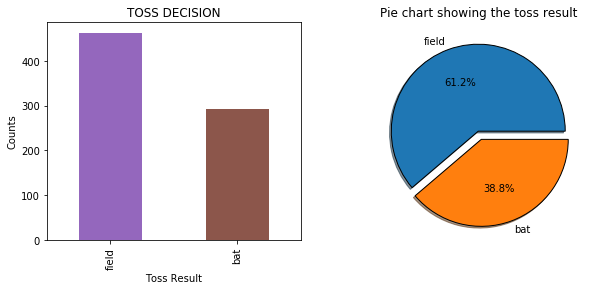

In [44]:
#Checking counts in our dataset with bar chart
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);
match.toss_decision.value_counts().plot(kind='bar',title='TOSS DECISION',color=['C4','C5']);
plt.xlabel('Toss Result')
plt.ylabel('Counts');

plt.subplot(1,2,2);
to_values=[463,293]
to_labels=["field","bat"]
plt.axis("equal")
plt.title("Pie chart showing the toss result")
plt.pie(to_values,labels=to_labels,radius=1.0,autopct='%0.1f%%',shadow=True,explode=[0,0.1],wedgeprops={'edgecolor':'black'});


### toss decision by season

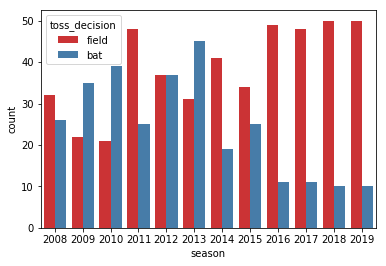

In [49]:
sb.countplot('season',hue='toss_decision',data=match,palette="Set1");

In [50]:
#grouping two categorical variables together(season vs toss decision)
bya=match.groupby("season").toss_decision.value_counts()
bya

season  toss_decision
2008    field            32
        bat              26
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    field            48
        bat              25
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    field            41
        bat              19
2015    field            34
        bat              25
2016    field            49
        bat              11
2017    field            48
        bat              11
2018    field            50
        bat              10
2019    field            50
        bat              10
Name: toss_decision, dtype: int64

In [52]:
#plotting clustered bar chart of toss decision vs season
bya=bya.reset_index(name='count')
bya.pivot(index='season',columns='toss_decision',values='count')

toss_decision  bat  field
season                   
2008            26     32
2009            35     22
2010            39     21
2011            25     48
2012            37     37
2013            45     31
2014            19     41
2015            25     34
2016            11     49
2017            11     48
2018            10     50
2019            10     50

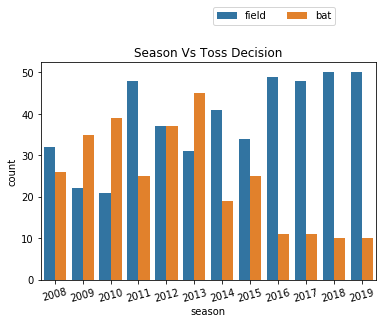

In [54]:
sb.countplot(data=match,x='season',hue='toss_decision')
plt.xticks(rotation=15)
plt.legend(loc="lower left", bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.title('Season Vs Toss Decision');

# INDIAN PREMIER LEAGUE WINNERS BY SEASON

In [57]:
final_matches=match.drop_duplicates(subset=['season'], keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')


season                 winner
1     2008       Rajasthan Royals
2     2009        Deccan Chargers
3     2010    Chennai Super Kings
4     2011    Chennai Super Kings
5     2012  Kolkata Knight Riders
6     2013         Mumbai Indians
7     2014  Kolkata Knight Riders
8     2015         Mumbai Indians
9     2016    Sunrisers Hyderabad
0     2017         Mumbai Indians
10    2018    Chennai Super Kings
11    2019         Mumbai Indians

**Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019). Mumbai Indians won the IPL trophy in 2013, 2015, 2017, and 2019.**

# IPL Finals
IPL Finals venues and winners along with the number of wins.

In [58]:
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

## WINNERS BY THEIR WIN BY RUNS

In [64]:
#Grouping winner column
win_win=pd.DataFrame(match.groupby('winner').sum()['win_by_runs'])
win_win

win_by_runs
winner                                  
Chennai Super Kings                 1778
Deccan Chargers                      421
Delhi Capitals                        92
Delhi Daredevils                     675
Gujarat Lions                          1
Kings XI Punjab                      925
Kochi Tuskers Kerala                  23
Kolkata Knight Riders               1086
Mumbai Indians                      1866
Pune Warriors                        139
Rajasthan Royals                     895
Rising Pune Supergiant               123
Rising Pune Supergiants               53
Royal Challengers Bangalore         1252
Sunrisers Hyderabad                  713

# Number of IPL seasons won by teams

In [70]:
final_matches['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Rajasthan Royals         1
Deccan Chargers          1
Name: winner, dtype: int64

# Win Percentage in Finals

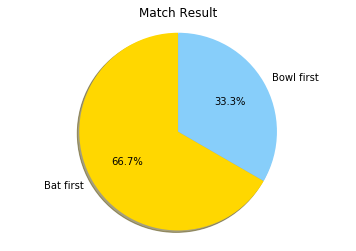

In [71]:
match=final_matches.win_by.value_counts()
labels=np.array(match.index)
sizes = match.values
colors = ['gold', 'lightskyblue']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Match Result')
plt.axis('equal')
plt.show()

# TOSS DECISION IN FINALS

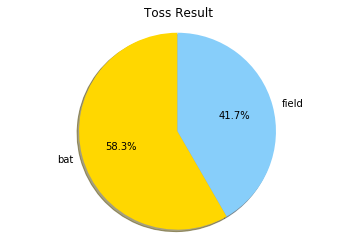

In [72]:
toss=final_matches.toss_decision.value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ['gold', 'lightskyblue']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss Result')
plt.axis('equal')
plt.show()


In [73]:
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

toss_winner toss_decision                 winner
0                Mumbai Indians           bat         Mumbai Indians
1              Rajasthan Royals         field       Rajasthan Royals
2   Royal Challengers Bangalore         field        Deccan Chargers
3           Chennai Super Kings           bat    Chennai Super Kings
4           Chennai Super Kings           bat    Chennai Super Kings
5           Chennai Super Kings           bat  Kolkata Knight Riders
6                Mumbai Indians           bat         Mumbai Indians
7         Kolkata Knight Riders         field  Kolkata Knight Riders
8           Chennai Super Kings         field         Mumbai Indians
9           Sunrisers Hyderabad           bat    Sunrisers Hyderabad
10          Chennai Super Kings         field    Chennai Super Kings
11               Mumbai Indians           bat         Mumbai Indians

# Man of the Match in final match

In [74]:
final_matches[['winner','player_of_match']].reset_index(drop=True)

winner player_of_match
0          Mumbai Indians       KH Pandya
1        Rajasthan Royals       YK Pathan
2         Deccan Chargers        A Kumble
3     Chennai Super Kings        SK Raina
4     Chennai Super Kings         M Vijay
5   Kolkata Knight Riders        MS Bisla
6          Mumbai Indians      KA Pollard
7   Kolkata Knight Riders       MK Pandey
8          Mumbai Indians       RG Sharma
9     Sunrisers Hyderabad     BCJ Cutting
10    Chennai Super Kings       SR Watson
11         Mumbai Indians       JJ Bumrah

# Is winning the toss really an advantage?

In [23]:
match['win_by_toss']=np.where(match['toss_winner']==match['winner'],'won','lost')

In [24]:
tos=match.win_by_toss.value_counts()
tos

won     390
lost    355
Name: win_by_toss, dtype: int64

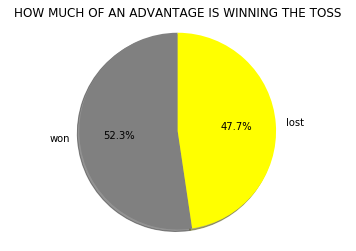

In [25]:
labels=np.array(tos.index)
sizes = tos.values
colors = ['grey', 'yellow']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('HOW MUCH OF AN ADVANTAGE IS WINNING THE TOSS')
plt.axis('equal')
plt.show()


**The probability of winning when the team had won the toss is 52%. So winning toss gives a slight edge over the opponent. However, it would be naive to term winning the toss as a greater advantage as there were 363 instances when the team losing the toss has won the game.**

# OR

In [55]:
match['tosw'] = 'no'
match['tosw'].ix[match.toss_winner == match.winner] = 'yes'

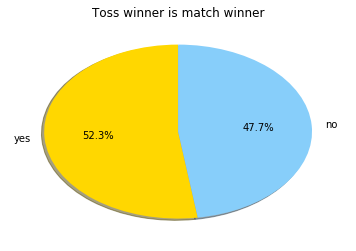

In [58]:
temp_series = match.tosw.value_counts()

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss winner is match winner")
plt.show()

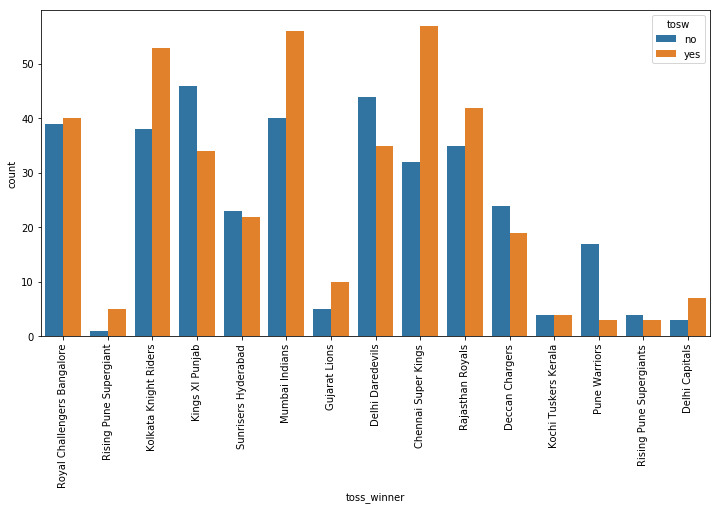

In [56]:
plt.figure(figsize=(12,6))
sb.countplot(x='toss_winner', hue='tosw', data=match)
plt.xticks(rotation='vertical')
plt.show()

**It seems for Chennai Super Kings (CSK) winning the toss is an indication of winning the match with high probability.**

*On the other hand, Pune Warriors end up losing the matches more often when they won the toss.*

**So far we have looked at the match data to get insights. Now let us look at the delivery dataset which is more granular to gain some more insights. To start with, let us look at the top few rows.**